## Import Libraries

In [65]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, label_binarize, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost, catboost, lightgbm
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import Sequential 

## Import data

In [2]:
data = pd.read_csv("Data/BlackFridaySales.csv")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


- Product category 1 ==> Cloths 
- Product category 2 ==> Electronics
- Product category 3 ==> Home goods

## Data preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
data.drop(columns = ["User_ID", "Product_ID"], inplace = True)

### Fixing **Age** column

In [5]:
data["Age"].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [6]:
def fix_age(val):
    try:
        l,b = val.split("-")
        return random.randint(int(l) + 1, int(b))
    except:
        return random.randint(56, 80)

In [7]:
data["Age"] = data["Age"].apply(fix_age)

### Fixing **Occupation** column

In [8]:
data["Occupation"] = data["Occupation"].astype('category')

### Fixing **City_Category** column

In [9]:
data["City_Category"] = data["City_Category"].astype('category')

### Fixing **Stay_In_Current_City_Years** column

In [10]:
data["Stay_In_Current_City_Years"].value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

In [11]:
data["Stay_In_Current_City_Years"] = data["Stay_In_Current_City_Years"].apply(lambda x: int(x[0])).astype('category')

### Fixing **Marital_Status** column

In [12]:
data["Marital_Status"] = data["Marital_Status"].astype('category')

### Fixing **Product_Category_2** column

In [13]:
data["Product_Category_2"].isnull().sum()

173638

In [14]:
data["Product_Category_2"] = data["Product_Category_2"].fillna(0).astype('int32')

### Fixing **Product_Category_3** column

In [15]:
data["Product_Category_3"].isna().sum()

383247

In [16]:
data["Product_Category_3"] = data["Product_Category_3"].fillna(0).astype('int32')

### Fixing **Gender** column

In [17]:
data["Gender"] = label_binarize(data["Gender"], classes = data["Gender"].unique())

In [18]:
data.drop_duplicates(keep = 'first', inplace = True)    # Remove duplicate entries

In [19]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,11,10,A,2,0,3,0,0,8370
1,0,5,10,A,2,0,1,6,14,15200
2,0,13,10,A,2,0,12,0,0,1422
3,0,4,10,A,2,0,12,14,0,1057
4,1,62,16,C,4,0,8,0,0,7969


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549389 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Gender                      549389 non-null  int32   
 1   Age                         549389 non-null  int64   
 2   Occupation                  549389 non-null  category
 3   City_Category               549389 non-null  category
 4   Stay_In_Current_City_Years  549389 non-null  category
 5   Marital_Status              549389 non-null  category
 6   Product_Category_1          549389 non-null  int64   
 7   Product_Category_2          549389 non-null  int32   
 8   Product_Category_3          549389 non-null  int32   
 9   Purchase                    549389 non-null  int64   
dtypes: category(4), int32(3), int64(3)
memory usage: 25.2 MB


## EDA

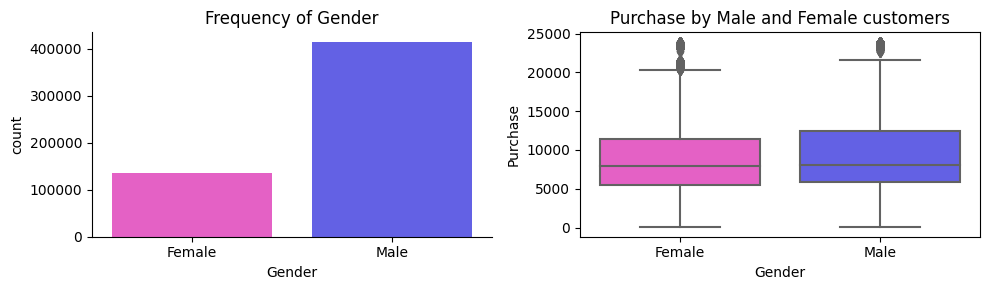

In [21]:
plt.figure(figsize = (10, 3))
plt.subplot(1, 2, 1)
sns.despine()
sns.countplot(x = data["Gender"], palette = ["#fa4bd1", "#4e4bfa"])
plt.xticks((0, 1), ("Female", "Male"))
plt.title("Frequency of Gender");

plt.subplot(1, 2, 2)
sns.boxplot(x = "Gender", y = "Purchase" , data = data, palette = ["#fa4bd1", "#4e4bfa"])
plt.title("Purchase by Male and Female customers");
plt.xticks((0, 1), ("Female", "Male"))
plt.tight_layout()

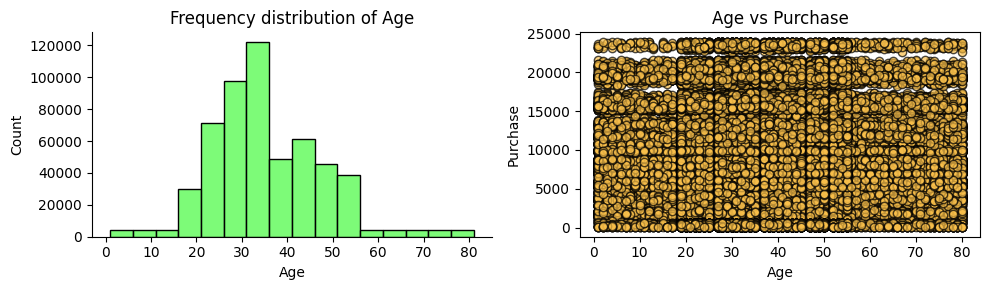

In [22]:
plt.figure(figsize = (10, 3))
plt.subplot(1, 2, 1)
sns.despine()
sns.histplot(x = data["Age"], binrange = (1, 80), binwidth = 5, color = '#51fa4b')
plt.title("Frequency distribution of Age");

plt.subplot(1, 2, 2)
sns.scatterplot(x = "Age", y = "Purchase", data = data, color = '#fac04b', linewidth = 1, edgecolor = 'black', alpha = 0.7)
plt.title("Age vs Purchase");
plt.tight_layout()

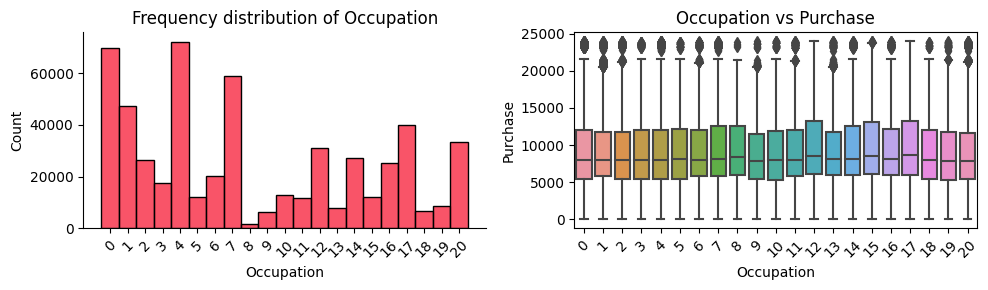

In [23]:
plt.figure(figsize = (10, 3))
plt.subplot(1, 2, 1)
sns.despine()
sns.histplot(x = data["Occupation"], binwidth = 2, color = '#f71b35')
plt.title("Frequency distribution of Occupation");
plt.xticks(np.arange(0, 21), rotation = 45)

plt.subplot(1, 2, 2)
sns.boxplot(x = "Occupation", y = "Purchase", data = data)
plt.title("Occupation vs Purchase");
plt.xticks(np.arange(0, 21), rotation = 45)
plt.tight_layout()

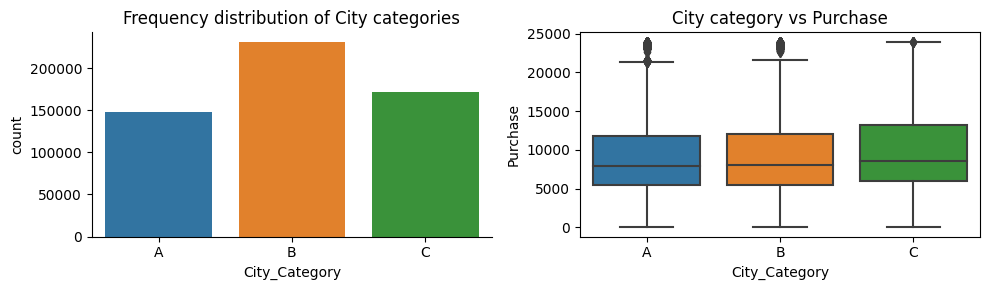

In [24]:
plt.figure(figsize = (10, 3))
plt.subplot(1, 2, 1)
sns.despine()
sns.countplot(x = data["City_Category"])
plt.title("Frequency distribution of City categories");

plt.subplot(1, 2, 2)
sns.boxplot(x = "City_Category", y = "Purchase", data = data)
plt.title("City category vs Purchase");
plt.tight_layout()

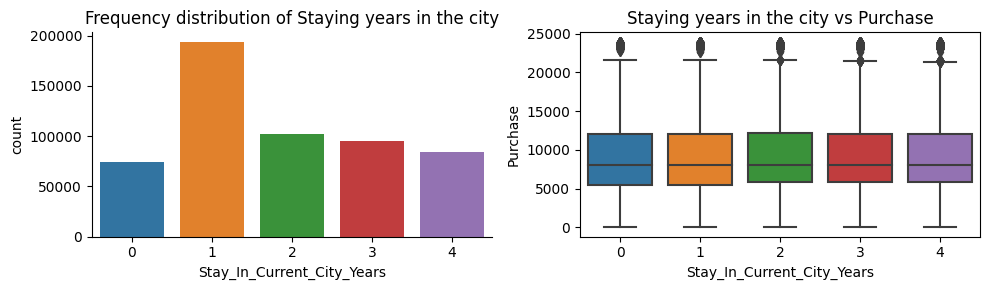

In [25]:
plt.figure(figsize = (10, 3))
plt.subplot(1, 2, 1)
sns.despine()
sns.countplot(x = data["Stay_In_Current_City_Years"])
plt.title("Frequency distribution of Staying years in the city");

plt.subplot(1, 2, 2)
sns.boxplot(x = "Stay_In_Current_City_Years", y = "Purchase", data = data)
plt.title("Staying years in the city vs Purchase");
plt.tight_layout()

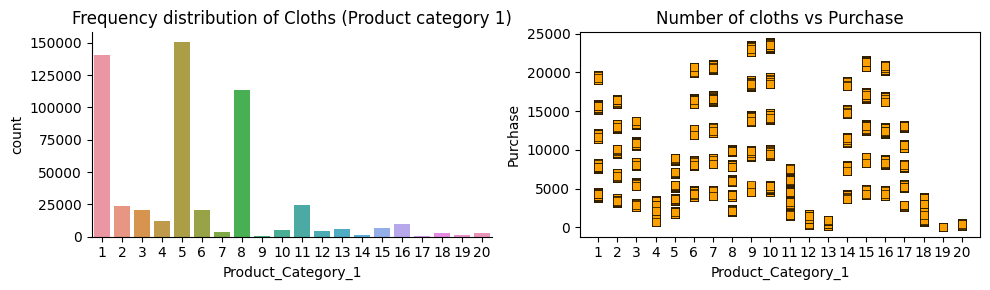

In [26]:
plt.figure(figsize = (10, 3))
plt.subplot(1, 2, 1)
sns.despine()
sns.countplot(x = data["Product_Category_1"])
plt.title("Frequency distribution of Cloths (Product category 1)");

plt.subplot(1, 2, 2)
sns.scatterplot(x = "Product_Category_1", y = "Purchase", data = data, edgecolor = 'black', marker = "s", color = '#fca000')
plt.title("Number of cloths vs Purchase");
plt.xticks(np.arange(data["Product_Category_1"].min(), data["Product_Category_1"].max() + 1))
plt.tight_layout()

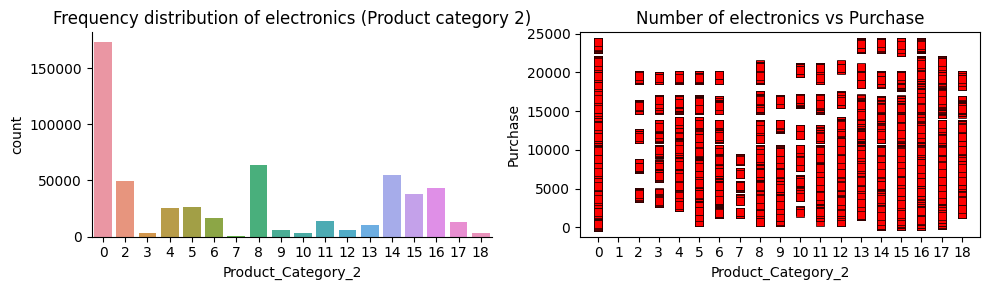

In [27]:
plt.figure(figsize = (10, 3))
plt.subplot(1, 2, 1)
sns.despine()
sns.countplot(x = data["Product_Category_2"])
plt.title("Frequency distribution of electronics (Product category 2)");

plt.subplot(1, 2, 2)
sns.scatterplot(x = "Product_Category_2", y = "Purchase", data = data, edgecolor = 'black', marker = "s", color = 'red')
plt.title("Number of electronics vs Purchase");
plt.xticks(np.arange(data["Product_Category_2"].min(), data["Product_Category_2"].max() + 1))
plt.tight_layout()

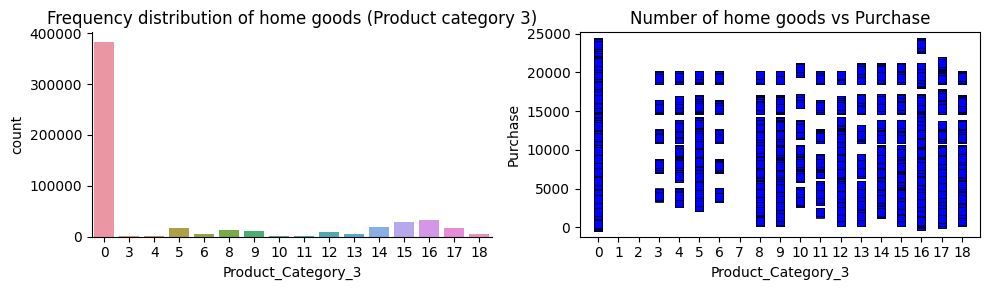

In [28]:
plt.figure(figsize = (10, 3))
plt.subplot(1, 2, 1)
sns.despine()
sns.countplot(x = data["Product_Category_3"])
plt.title("Frequency distribution of home goods (Product category 3)");

plt.subplot(1, 2, 2)
sns.scatterplot(x = "Product_Category_3", y = "Purchase", data = data, edgecolor = 'black', marker = "s", color = 'blue')
plt.title("Number of home goods vs Purchase");
plt.xticks(np.arange(data["Product_Category_3"].min(), data["Product_Category_3"].max() + 1))
plt.tight_layout()

## Train Test split

In [29]:
X = data.iloc[:, :-1].values 
y = data.iloc[:, -1].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

- One hot encoding the categorical column

In [31]:
transformer = ColumnTransformer(transformers = [('encoder', OneHotEncoder(drop = 'first'), [3])], remainder = 'passthrough')
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [32]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

## Modelling experiments

In [33]:
def model_performance(name, y_test, y_pred):
    return{
        'name': name,
        'r2_score': np.round(r2_score(y_test, y_pred), 2),
        'mae': np.round(mean_absolute_error(y_test, y_pred), 2),
        'mse': np.round(mean_squared_error(y_test, y_pred), 2),
        'rmse': np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2),
    }

### Model1: Linear Regression

In [34]:
lin_reg = LinearRegression(n_jobs = -1)
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
lin_reg_perf = model_performance("linear_regression", y_test, y_pred)
lin_reg_perf

{'name': 'linear_regression',
 'r2_score': 0.15,
 'mae': 3527.83,
 'mse': 21367658.88,
 'rmse': 4622.52}

### Model2: Decision Tree

In [35]:
dree = DecisionTreeRegressor()
dree.fit(X_train, y_train)

y_pred = dree.predict(X_test)
dtree_perf = model_performance("decision_tree", y_test, y_pred)
dtree_perf

{'name': 'decision_tree',
 'r2_score': 0.42,
 'mae': 2675.13,
 'mse': 14642770.06,
 'rmse': 3826.59}

### Model3: Random Forest

In [36]:
rdf = RandomForestRegressor(n_jobs = -1, random_state = 1)
rdf.fit(X_train, y_train)

y_pred = rdf.predict(X_test)
rdf_perf = model_performance("random_forest", y_test, y_pred)
rdf_perf

{'name': 'random_forest',
 'r2_score': 0.61,
 'mae': 2299.55,
 'mse': 9857862.59,
 'rmse': 3139.72}

### Model4: Gradient Boosting

In [37]:
gdb = GradientBoostingRegressor(random_state = 1)
gdb.fit(X_train, y_train)

y_pred = gdb.predict(X_test)
gdb_perf = model_performance("gradient_boosting", y_test, y_pred)
gdb_perf

{'name': 'gradient_boosting',
 'r2_score': 0.65,
 'mae': 2265.16,
 'mse': 8907821.54,
 'rmse': 2984.6}

### Model5: LightGBM

In [38]:
lgbm = lightgbm.LGBMRegressor()
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)
lgbm_perf = model_performance("light_gbm", y_test, y_pred)
lgbm_perf

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 165
[LightGBM] [Info] Number of data points in the train set: 412041, number of used features: 10
[LightGBM] [Info] Start training from score 9262.556792


{'name': 'light_gbm',
 'r2_score': 0.66,
 'mae': 2191.83,
 'mse': 8477614.2,
 'rmse': 2911.63}

### Model6: XGBoost

In [39]:
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
xgb_perf = model_performance("xgboost", y_test, y_pred)
xgb_perf

{'name': 'xgboost',
 'r2_score': 0.67,
 'mae': 2158.72,
 'mse': 8310674.81,
 'rmse': 2882.82}

### Model7: CatBoost

In [92]:
ctb = catboost.CatBoostRegressor(verbose = 0)
ctb.fit(X_train, y_train)

y_pred = ctb.predict(X_test)
ctb_perf = model_performance("catboost", y_test, y_pred)
ctb_perf

{'name': 'catboost',
 'r2_score': 0.67,
 'mae': 2158.14,
 'mse': 8294437.13,
 'rmse': 2880.01}

### Model8: ANN

In [66]:
model_ckpt = ModelCheckpoint(
    filepath = 'saved_models/ann.keras',
    monitor = 'val_loss',
    save_best_only = True,
    verbose = 1
)

In [67]:
reduce_on_plateau = ReduceLROnPlateau(
    monitor = 'val_loss',
    patience = 5,
    min_lr = 0.0001
)

In [68]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- For better speed and performance, I am using `tf.data` pipeline

In [69]:
train_set = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train))
test_set = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test))

train_set = train_set.batch(batch_size = 64).prefetch(tf.data.AUTOTUNE)
test_set = test_set.batch(batch_size = 64).prefetch(tf.data.AUTOTUNE)

In [70]:
model = Sequential()
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(rate = 0.4))
model.add(Dense(units = 1))

In [71]:
model.compile(
    loss = 'mae',
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
    metrics = 'mae'
)

In [72]:
model_hist = model.fit(train_set, validation_data = test_set, epochs = 50, callbacks = [model_ckpt, reduce_on_plateau])

Epoch 1/50


6428/6439 [============================>.] - ETA: 0s - loss: 3312.7922 - mae: 3312.7922
Epoch 1: val_loss improved from inf to 2621.43604, saving model to saved_models\ann.keras
6439/6439 [==============================] - 12s 2ms/step - loss: 3312.0017 - mae: 3312.0017 - val_loss: 2621.4360 - val_mae: 2621.4360 - lr: 0.0030
Epoch 2/50
6430/6439 [============================>.] - ETA: 0s - loss: 2612.3564 - mae: 2612.3564
Epoch 2: val_loss improved from 2621.43604 to 2456.29932, saving model to saved_models\ann.keras
6439/6439 [==============================] - 11s 2ms/step - loss: 2612.4375 - mae: 2612.4375 - val_loss: 2456.2993 - val_mae: 2456.2993 - lr: 0.0030
Epoch 3/50
6431/6439 [============================>.] - ETA: 0s - loss: 2536.0793 - mae: 2536.0793
Epoch 3: val_loss improved from 2456.29932 to 2376.43604, saving model to saved_models\ann.keras
6439/6439 [==============================] - 11s 2ms/step - loss: 2536.1326 - mae: 2536.1326 - val_loss: 2376.4360 - val_mae: 2376.4

In [73]:
best_ann_model = tf.keras.models.load_model("saved_models/ann.keras")

In [74]:
y_pred = best_ann_model.predict(X_test_scaled)

4293/4293 [==============================] - 4s 818us/step


In [84]:
ann_perf = model_performance("ann", y_test, y_pred)
ann_perf

{'name': 'ann',
 'r2_score': 0.64,
 'mae': 2227.89,
 'mse': 9161120.41,
 'rmse': 3026.73}

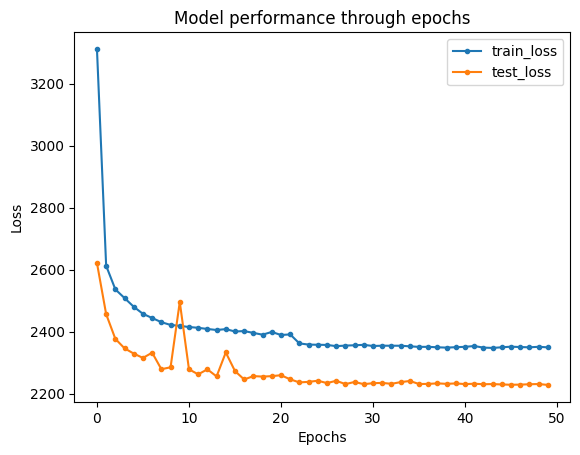

In [83]:
plt.plot(model_hist.epoch, model_hist.history["loss"], label = 'train_loss', marker = '.');
plt.plot(model_hist.epoch, model_hist.history["val_loss"], label = 'test_loss', marker = '.');
plt.legend();
plt.title("Model performance through epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss");

## Model Performance Summary

In [93]:
model_performance_df = pd.DataFrame(
    [lin_reg_perf.values(),
    dtree_perf.values(),
    rdf_perf.values(),
    gdb_perf.values(),
    xgb_perf.values(),
    lgbm_perf.values(),
    ctb_perf.values(),
    ann_perf.values()],
    columns = ann_perf.keys()
).set_index("name")

In [97]:
model_performance_df.sort_values("mae", ascending = True).style.background_gradient(cmap = 'gnuplot')

,r2_score,mae,mse,rmse
name,,,,
catboost,0.670000,2158.140000,8294437.130000,2880.010000
xgboost,0.670000,2158.720000,8310674.810000,2882.820000
light_gbm,0.660000,2191.830000,8477614.200000,2911.630000
ann,0.640000,2227.890000,9161120.410000,3026.730000
gradient_boosting,0.650000,2265.160000,8907821.540000,2984.600000
random_forest,0.610000,2299.550000,9857862.590000,3139.720000
decision_tree,0.420000,2675.130000,14642770.060000,3826.590000
linear_regression,0.150000,3527.830000,21367658.880000,4622.520000


### `CatBoost` is the best performing model for this problem with mae `2158.14` and R2 score of `0.67`